In [2]:
import numpy as np
import matplotlib.pyplot as plt

Intermediate goal: approximate $\sigma(x_0, E)$ for all $x_0 \in E$.

(-5.0, 5.0)

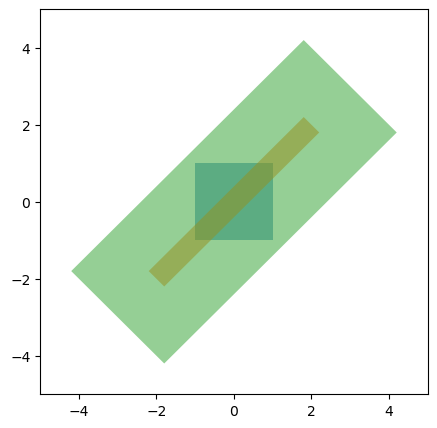

In [18]:
# Parallelogram: a matrix that represents the image of [-1,1]x[-1,1]
# para[n] rpresents the midpoint of the n-th edge

def _parallelogram_addition(para1, para2):
    matrix = np.linalg.inv(para1)

    vertex0 = (para2[0] + para2[1]) @ matrix
    vertex1 = (para2[0] - para2[1]) @ matrix

    m0 = np.max(np.abs([vertex0[0], vertex1[0]])) + 1
    m1 = np.max(np.abs([vertex0[1], vertex1[1]])) + 1

    new_para = np.diag([m0, m1]) @ para1

    return new_para

def parallelogram_addition(para1, para2):
    new_para1 = _parallelogram_addition(para1, para2)
    new_para2 = _parallelogram_addition(para2, para1)

    if parallelogram_area(new_para1) <= parallelogram_area(new_para2):
        return new_para1
    else:
        return new_para2

def parallelogram_area(para):
    return 4*np.linalg.det(para)

def parallelogram_vertices(para):
    return np.array([
        para[0] + para[1],
        -para[0] + para[1],
        -para[0] - para[1],
        para[0] - para[1]
    ])

def plot_parallelogram(ax: plt.Axes, para):
    vertices = parallelogram_vertices(para)
    ax.fill(vertices[:,0], vertices[:,1], alpha=0.5)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

para1 = np.array([[1, 0], [0, 1]])
para2 = np.array([[2, 2], [0.2, -0.2]])

plot_parallelogram(ax, para1)
plot_parallelogram(ax, para2)
plot_parallelogram(ax, parallelogram_addition(para1, para2))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)